<a href="https://colab.research.google.com/github/sandydasari/medcatspacy/blob/main/Confidencelevel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!python -m spacy download en_core_web_md


     |████████████████████████████████| 96.4 MB 78.0 MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-py3-none-any.whl size=98051301 sha256=94d7e9cd95365dca938a9b9ea20fd35c8351cf71693df4a7612fdf71b62e14af
  Stored in directory: /tmp/pip-ephem-wheel-cache-0udsxv2m/wheels/69/c5/b8/4f1c029d89238734311b3269762ab2ee325a42da2ce8edb997
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
import spacy
from collections import defaultdict


nlp = spacy.load('en_core_web_md')


    

In [ ]:
text= """NAME Sandhya, REF BY: DR.DUMMY DUMMY, SAMPLE REPORT
Sample ID | MMG20200057563 Sample Type | Oropharyngeal/Nasopharyngeal_
| Gender | Male Sample Collected On Oct 30, 2020 : 10;00
| Age / DOB 3 | Report Date Oct 30, 2020 :
| Aadhar Number 1234 5678 9101 Mobile Number 123456789
Referred By Hospital
| Passport Number 123456 ‘Nationality Nie
RT-PCR test for COVID-19 (NOVEL CORONA VIRUS)

Result

| Investigation CT Value Result |
SARS-CoV-2 virus detection (N Gene) Undetermined   (Positive)
"""


In [ ]:
keys = []
values = []

In [ ]:
text1 = nlp(text.lower())
for w in text1.ents:
  if w.label_=='PERSON':
    keys.append('PERSON')
    values.append(w.text)
    print(w.text)

sandhya


In [ ]:
text1= nlp(text)
for w in text1.ents:
    print(w.text,w.label_)

Sandhya PERSON
| CARDINAL
MMG20200057563 PRODUCT
Oct 30 DATE
2020 DATE
10;00 CARDINAL
Date Oct 30 DATE
2020 DATE
123456789 CARDINAL
By Hospital ORG
| CARDINAL
123456 CARDINAL
| CARDINAL


In [ ]:
text1 = nlp(text)
for w in text1.ents:
  if w.label_=='DATE':
    keys.append('DATE')
    values.append(w.text)
    print(w.text)

Oct 30
2020
Date Oct 30
2020


In [ ]:
beams = nlp.entity.beam_parse([ text1 ], beam_width = 16, beam_density = 0.001)
entity_scores = defaultdict(float)
for beam in beams:
  for score, ents in nlp.entity.moves.get_beam_parses(beam):
      for start, end, label in ents:
        entity_scores[(start, label)] += score

In [ ]:
threshold = 0.2
for key in entity_scores:
  start, label = key
  score = entity_scores[key]
  if score > threshold:
      print ('Label: {}, text:{}, Confidencelevel: {}'.format(label, text1[start: start+1], score))

Label: PERSON, text:sandhya, Confidencelevel: 1.0000000000000002
Label: WORK_OF_ART, text:dr.dummy, Confidencelevel: 1.0000000000000002
Label: DATE, text:|, Confidencelevel: 0.5521787437905379
Label: PRODUCT, text:mmg20200057563, Confidencelevel: 0.5521787437905379
Label: CARDINAL, text:|, Confidencelevel: 1.0000000000000002
Label: DATE, text:oct, Confidencelevel: 1.0000000000000002
Label: DATE, text:2020, Confidencelevel: 1.0000000000000002
Label: CARDINAL, text:10;00, Confidencelevel: 1.0000000000000002
Label: DATE, text:|, Confidencelevel: 0.5091340368730973
Label: CARDINAL, text:3, Confidencelevel: 1.0000000000000002
Label: DATE, text:oct, Confidencelevel: 1.0000000000000002
Label: DATE, text:2020, Confidencelevel: 1.0000000000000002
Label: CARDINAL, text:9101, Confidencelevel: 1.0000000000000002
Label: CARDINAL, text:123456789, Confidencelevel: 1.0000000000000002
Label: CARDINAL, text:covid-19, Confidencelevel: 1.0000000000000002
Label: CARDINAL, text:|, Confidencelevel: 0.9470574

In [ ]:
import re
def patientID(text):
  ID_REG = re.compile(r'[a-zA-Z0-9\.\-+_]{14}')
  IDs = re.findall(ID_REG,text)
  patientID = ",".join(IDs)
  patientID = patientID.split(',')
  patientID = patientID[0]

  return patientID

In [ ]:
patientID=patientID(text)
print(patientID)


MMG20200057563


In [ ]:
list_words= text.split()
index =list_words.index("ID")
pre_IDs=list_words[index-3:index+3]
for i in pre_IDs:
  if i==patientID:
    ID=i
keys.append('PATIENT ID')
values.append(ID)
print(ID)








MMG20200057563


In [ ]:
import json 

In [ ]:

dictionary = dict(zip(keys, values))
json_object = json.dumps(dictionary, indent = 4) 
print(json_object)

{
    "PERSON": "sandhya",
    "DATE": "2020",
    "PATIENT ID": "MMG20200057563"
}


List of Possible Lables and how to implement them :- 
1. organism - Disease ( medcat )
2. procedure -Symptons ( Virua Detection )
3. Aadhar Number ( spacy ) - regx ( 12 digits )
4. Phone Number ( spacy ) - regx  (10 digits )
5. Dosage ( medact )
6. intended site ( m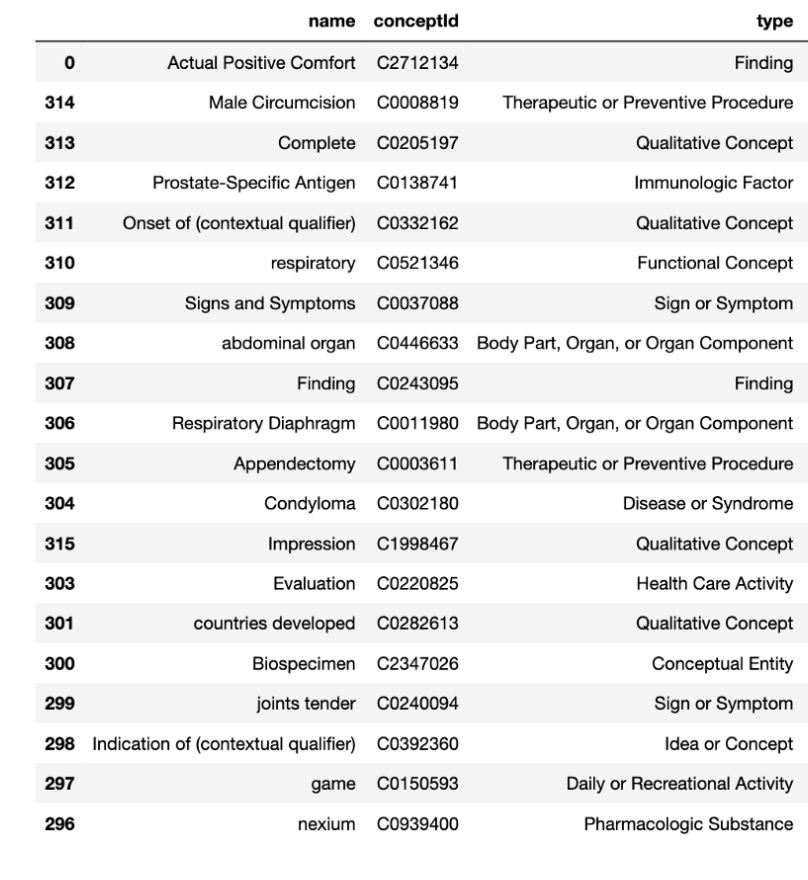edcat )
7. body structure - Gender ( medact )
8. illness ( medcat )

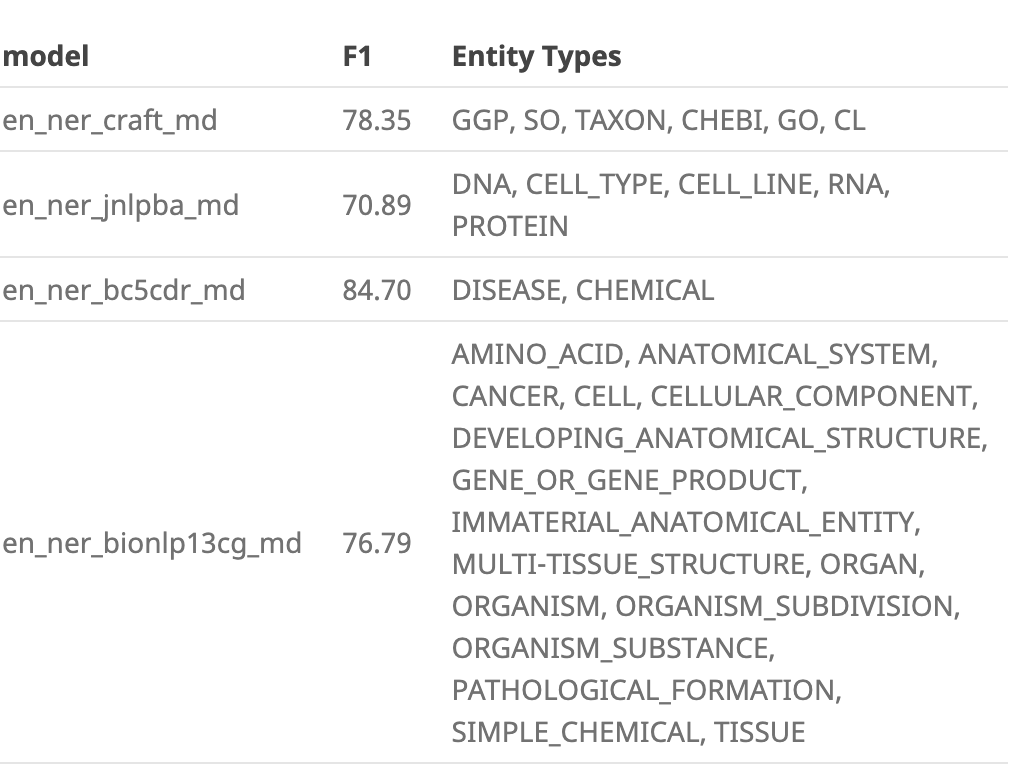